In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np



In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leona\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("Letras.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()


,Títulos,Artistas,Letras
0,Volando (remix) (part. Bad Bunny y Sech),Mora,"['Yeah-yeah, yeah-yeah', 'Yeh-eh, ey, ey', 'Di..."
1,Yonaguni,Bad Bunny,"['Yeah, yeah, yeah, yeah', 'Yeah, yeah, yeah, ..."
2,Pepas,Farruko,"['No me importa lo que de mí se diga', 'Viva u..."
3,"Te Bote (remix) (part. Casper, Nio García, Dar...",Bad Bunny,"['[Darell]', 'Este es el verdadero remix, baby..."
4,"Poblado (remix) (part. Karol G, Nicky Jam, Cri...",J Balvin,"['Kapital Music', '(¿Aló?)', '(Ya estoy en Med..."


In [4]:
df.tail()

,Títulos,Artistas,Letras
735,Luna Dile,Nigga (Flex),"['romantic style in the world,', '!I Love You ..."
736,"+Linda (remix) (part. Arcángel, Manuel Turizo,...",Dalex,"['(Remix, baby)', ""Ya no hay excusa pa' recupe..."
737,"Si Tu Lo Dejas (part. Rvssian, Farruko, Nicky ...",Bad Bunny,"['Yeh', '(Hey Rvssian)', '[Bad Bunny, Nicky Ja..."
738,Fiebre,Bad Gyal,"['Llega Ba- ba Bad Gyal', 'Cuando yo te bailo,..."
739,SOLA ES MEJOR (part. Yandar & Yostin),KAROL G,"['Por eso no me enamoro', 'Porque esta zona es..."


## Preprocesamiento

- Limpiamos el texto de etiquetas html
- Tokenizamos
- Removemos las stopwords
- Stemming: volvemos las palabras a su raiz(puede no tener significado)
- Lemmatizing: volvemos las palabras a su raiz(tiene significado)


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import SnowballStemmer
np.random.seed(400)


#STEMMATIZER FUNCTION
#vuelve las palabras a su raiz (puede no tener significado)
porter = PorterStemmer()
def stemm_token(text):
    return [porter.stem(word) for word in text]

#LEMMATIZER FUNCTION
#vuelve las palabras a su raiz (sí tiene significado)
import spacy
import es_core_news_lg
sp = es_core_news_lg.load()



def lemmatizer(text):
    
    result_l = []
    
    for token in range(len(text)):
        objeto_letra = sp(text[token])
        for word in objeto_letra:
            result_l.append(" ".join([word.lemma_ for word in objeto_letra]))
    return result_l  
    
    

# TOKENIZER
def tokenizer(text):
    return nltk.word_tokenize(text,"spanish")



# PUNCTUATION PREPROCESSOR

import re
def preprocessor(text):
    #Para eliminar las etiquetas HTML
    text = re.sub(r'<[^>]*>', '', text)
    #Eliminamos todos los caracteres que no sean palabras
    text = re.sub(r'[\W]+', ' ', text.lower()) 
    return text





In [6]:
# LIMPIEZA DEL TEXTO

df["Letras"] = df["Letras"].apply(lambda x: preprocessor(x))

In [7]:
#TOKENIZACION

df["Letras"] = df["Letras"].apply(lambda x: tokenizer(x))
df.head()

,Títulos,Artistas,Letras
0,Volando (remix) (part. Bad Bunny y Sech),Mora,"[yeah, yeah, yeah, yeah, yeh, eh, ey, ey, disf..."
1,Yonaguni,Bad Bunny,"[yeah, yeah, yeah, yeah, yeah, yeah, yeah, yea..."
2,Pepas,Farruko,"[no, me, importa, lo, que, de, mí, se, diga, v..."
3,"Te Bote (remix) (part. Casper, Nio García, Dar...",Bad Bunny,"[darell, este, es, el, verdadero, remix, baby,..."
4,"Poblado (remix) (part. Karol G, Nicky Jam, Cri...",J Balvin,"[kapital, music, aló, ya, estoy, en, medallo, ..."


In [8]:
# STEMMATIZER

df["Letras"] =df["Letras"].apply(lambda x: stemm_token(x))
df.head()

,Títulos,Artistas,Letras
0,Volando (remix) (part. Bad Bunny y Sech),Mora,"[yeah, yeah, yeah, yeah, yeh, eh, ey, ey, disf..."
1,Yonaguni,Bad Bunny,"[yeah, yeah, yeah, yeah, yeah, yeah, yeah, yea..."
2,Pepas,Farruko,"[no, me, importa, lo, que, de, mí, se, diga, v..."
3,"Te Bote (remix) (part. Casper, Nio García, Dar...",Bad Bunny,"[darel, est, es, el, verdadero, remix, babi, o..."
4,"Poblado (remix) (part. Karol G, Nicky Jam, Cri...",J Balvin,"[kapit, music, aló, ya, estoy, en, medallo, mo..."


In [9]:
#STOPWORDS
#PALABRAS FUNCIONALES

palabras_funcionales=nltk.corpus.stopwords.words("spanish")

#GLOSARIO PALABRAS REGGAETON

import requests
from bs4 import BeautifulSoup

response = requests.get("https://www.metroecuador.com.ec/ec/noticias/2017/02/01/acicalao-dembow-fantasmeo-glosario-reggaeton.html")
url = "https://www.metroecuador.com.ec/ec/noticias/2017/02/01/acicalao-dembow-fantasmeo-glosario-reggaeton.html"
response = requests.get(url)
print(bool(response))
soup = BeautifulSoup(response.text, "html.parser")

divs = soup.find_all("p")
glosario_r = list()

for i in range(len(divs[3:])):
    try:
        glosario_r.append(divs[i].find("strong").get_text(strip=True))
    except AttributeError:
        pass
   


True


In [10]:
def stop_words(text):
    
    result = []
    
    for token in text:
        if token not in palabras_funcionales and len(token) > 3 and token != "yeah" and token != "baby":
            result.append(token)
        elif token in glosario_r and token != "porqu":
            result.append(token)
    return result         


In [11]:
df["Letras"] = df["Letras"].apply(lambda x: stop_words(x))
df.head()

,Títulos,Artistas,Letras
0,Volando (remix) (part. Bad Bunny y Sech),Mora,"[disfruto, poder, vert, aunqu, conmigo, confor..."
1,Yonaguni,Bad Bunny,"[noch, copa, deja, ment, aunqu, debo, pensar, ..."
2,Pepas,Farruko,"[importa, diga, viva, vida, vivo, solo, disfru..."
3,"Te Bote (remix) (part. Casper, Nio García, Dar...",Bad Bunny,"[darel, verdadero, remix, babi, ozuna, paso, m..."
4,"Poblado (remix) (part. Karol G, Nicky Jam, Cri...",J Balvin,"[kapit, music, medallo, colombia, gang, gang, ..."


In [12]:
# LEMMATIZACION


df["Letras"] = df["Letras"].apply(lambda x: lemmatizer(x))
df["Letras"].head()

0    [disfrutar, poder, vert, aunqu, yo, conformarm...
1    [noch, copa, dejar, ment, aunqu, deber, pensar...
2    [importar, decir, vivir, vida, vivir, solo, di...
3    [darel, verdadero, remix, babi, ozuna, paso, m...
4    [kapit, music, medallo, colombia, gang, gang, ...
Name: Letras, dtype: object

## Bag Of Words usando gensim.corpora.dictionary

In [13]:
#CREAMOS UN DICCIONARIO CON LOS TOKENS_STEMM (lematizados y stematizados)
#Lista de tuplas con dos items, el id del token y el numero de veces que ese token aparece en el set de entrenamiento


dictionary = gensim.corpora.Dictionary(df["Letras"])




#VECTOR DE CARACTERISTICAS A PARTIR DE CADA LETRA QUE CONTIENE 
#EL RECUENTO DE LA FRECUENCIA EN QUE CADA PALABRA APARECE EN LAS CANCIONES

#from sklearn.feature_extraction.text import CountVectorizer
#count = CountVectorizer()
#bag = count.fit_transform(tokens_unicos)
#bag_np = bag.toarray()
#bag_np.shape

In [14]:
# FILTRAMOS PALABRAS COMUNES Y RARAS

dictionary.filter_extremes(no_below = 5,no_above=0.5, keep_n=100000)

### Gensim doc2bow

Gensim doc2bow

gensimdoc2bow(document)

Convierte un documento (una lista de palabras) en una bolsa de palabras con el formato = lista de token_id,token_count)

In [15]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df["Letras"]]

In [16]:
#chequeamos que este haciendo las tuplas 

bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 5),
 (7, 2),
 (8, 1),
 (9, 4),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 3),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 3),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 4),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 6),
 (57, 7),
 (58, 2),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 3),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 5),
 (68, 1),
 (69, 2),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 3),
 (76, 1),
 (77, 1),
 (78, 2),
 (79, 3),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 4),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 7),
 (93, 4),
 (94, 1),
 (95, 1),
 (96, 2),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

## TFID

frecuencia de término-frecuencia inversa de documento, se utiliza para disminuir el peso de las palabras que aparecen muchas veces en multiples documentos.

In [17]:
from gensim import corpora, models

#creamos el objeto usando el modelo TFIDF
tfidf = models.TfidfModel(bow_corpus)

In [18]:
#aplicamos la transformacion a todo el cuerpo del bow corpus

corpus_tfidf = tfidf[bow_corpus]
print(corpus_tfidf[1])

[(6, 0.10513240347145969), (11, 0.20819122656804373), (20, 0.028496323984081577), (23, 0.08970342868057132), (27, 0.1963203367505995), (57, 0.09594444685779167), (60, 0.05256002476847414), (63, 0.04402263125787276), (67, 0.17979243844805037), (76, 0.10194737439844033), (106, 0.06324587047911087), (116, 0.10664900586627378), (117, 0.08209180167554012), (118, 0.10266039846943761), (119, 0.10087522646857332), (120, 0.11136652713083105), (121, 0.04402263125787276), (122, 0.09475873038971967), (123, 0.16016629901922647), (124, 0.19976005983117268), (125, 0.04519895796446586), (126, 0.052367289118138906), (127, 0.09096540490961894), (128, 0.13176485223500367), (129, 0.09343153018773846), (130, 0.10515176141701141), (131, 0.09096540490961894), (132, 0.0921690978071799), (133, 0.1020458616855827), (134, 0.18194880470610125), (135, 0.07132376328283471), (136, 0.04421500932732963), (137, 0.08381742306059439), (138, 0.09615770520401605), (139, 0.06293414904096481), (140, 0.05692262158943185), (14

## LDA Model

Se utiliza para clasificar el texto de un documento en un tema en particular. Construye un modelo de tema por documento y palabras por modelo de tema, modelado como distribuciones de Dirichlet.

Cada documento se modela como una distribución multinomial de temas y cada tema se modela como una distribución multinomial de palabras.

LDA asume que cada fragmento de texto que alimentamos contendrá palabras que de alguna manera están relacionadas. Por lo tanto, elegir el corpus de datos adecuado es crucial.
También asume que los documentos se producen a partir de una combinación de temas. Luego, esos temas generan palabras basadas en su distribución de probabilidad


In [19]:
# hacemos correr el modelo con el conjunto de entrenamiento

lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics = 10,
                                       id2word = dictionary,
                                       passes = 2,
                                       workers = 2 
)

In [20]:
#para cada topico exploramos las palabras que mas lo representan

for idx, topic in lda_model.print_topics(-1):
    
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")


Topic: 0 
Words: 0.019*"dejar" + 0.018*"gustar" + 0.014*"siempr" + 0.012*"poder" + 0.010*"bien" + 0.010*"quier" + 0.008*"yo" + 0.007*"cuerpo" + 0.007*"contar" + 0.007*"pasar"


Topic: 1 
Words: 0.014*"pasar" + 0.013*"ahora" + 0.011*"quier" + 0.011*"siempr" + 0.009*"dimir" + 0.008*"volver" + 0.007*"cómo" + 0.007*"bien" + 0.007*"bebé" + 0.007*"aunqu"


Topic: 2 
Words: 0.014*"quier" + 0.012*"llamar" + 0.011*"noch" + 0.011*"poner" + 0.010*"siempr" + 0.009*"bailar" + 0.008*"gustar" + 0.008*"mami" + 0.008*"aquí" + 0.008*"dalar"


Topic: 3 
Words: 0.020*"quier" + 0.014*"amor" + 0.012*"ahora" + 0.012*"vamo" + 0.010*"porqu" + 0.010*"mami" + 0.009*"poder" + 0.008*"fuist" + 0.008*"cómo" + 0.007*"dejar"


Topic: 4 
Words: 0.015*"vida" + 0.012*"noch" + 0.011*"poner" + 0.010*"ahora" + 0.008*"porqu" + 0.007*"quier" + 0.007*"dimir" + 0.007*"llamar" + 0.007*"vamo" + 0.006*"cabrón"


Topic: 5 
Words: 0.011*"gustar" + 0.010*"quier" + 0.008*"poner" + 0.007*"siempr" + 0.007*"amor" + 0.007*"mami" + 0.006*"

In [21]:
# hacemos correr el modelo con el conjunto del tfidf

lda_model_tfdif = gensim.models.LdaMulticore(corpus_tfidf,
                                       num_topics = 10,
                                       id2word = dictionary,
                                       passes = 2,
                                       workers = 2 
)

In [22]:
for idx, topic in lda_model_tfdif.print_topics(-1):
    
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.003*"bebé" + 0.003*"gustar" + 0.003*"mata" + 0.002*"siempr" + 0.002*"noch" + 0.002*"dile" + 0.002*"hablar" + 0.002*"loco" + 0.002*"llamar" + 0.002*"enamorar"


Topic: 1 
Words: 0.004*"locura" + 0.003*"ahora" + 0.003*"poder" + 0.003*"pensar" + 0.003*"quier" + 0.003*"amor" + 0.003*"feliz" + 0.003*"contar" + 0.003*"dejar" + 0.003*"aquí"


Topic: 2 
Words: 0.003*"perdónam" + 0.003*"aunqu" + 0.003*"ahora" + 0.003*"quier" + 0.003*"mejor" + 0.003*"cómo" + 0.003*"lindo" + 0.003*"pasar" + 0.003*"vida" + 0.002*"nadi"


Topic: 3 
Words: 0.003*"amor" + 0.003*"quier" + 0.003*"durar" + 0.002*"cuerpo" + 0.002*"dar" + 0.002*"todavía" + 0.002*"bail" + 0.002*"bailar" + 0.002*"soltero" + 0.002*"nombr"


Topic: 4 
Words: 0.003*"vuelta" + 0.003*"ahora" + 0.003*"enamorado" + 0.003*"mundo" + 0.003*"enamorar" + 0.003*"llorar" + 0.003*"amor" + 0.003*"dond" + 0.002*"niña" + 0.002*"sient"


Topic: 5 
Words: 0.004*"bailar" + 0.004*"cabrón" + 0.003*"bebé" + 0.003*"dimir" + 0.003*"siempr" + 0.002

## Performance evaluation

In [23]:
df["Letras"][700]

['marido',
 'quier',
 'dejar',
 'perquin',
 'arréglat',
 'salir',
 'solo',
 'culo',
 'seguro',
 'mami',
 'arrastrar',
 'cola',
 'malo',
 'dile',
 'ciao',
 'noch',
 'dile',
 'hola',
 'poner',
 'bonito',
 'contar',
 'perder',
 'vivir',
 'aparentar',
 'ahora',
 'salir',
 'arrebatar',
 'dema',
 'envidia',
 'mata',
 'subir',
 'historia',
 'contar',
 'logi',
 'rescatar',
 'ponl',
 'batería',
 'reggaetón',
 'salir',
 'noch',
 'arrebatar',
 'amiga',
 'vist',
 'dolc',
 'nena',
 'tipa',
 'comparar',
 'cort',
 'maldito',
 'prenda',
 'cara',
 'ponl',
 'batería',
 'raggeatón',
 'salir',
 'porsch',
 'arrebaatar',
 'amiga',
 'vist',
 'dolc',
 'nena',
 'tipa',
 'comparar',
 'cort',
 'maldito',
 'prenda',
 'cara',
 'pont',
 'pose',
 'marciano',
 'romp',
 'nosotro',
 'somo',
 'cort',
 'pretendient',
 'dile',
 'misión',
 'abort',
 'mando',
 'usar',
 'port',
 'entrart',
 'chocart',
 'gata',
 'cuenteo',
 'hacer',
 'poder',
 'hacer',
 'chanteo',
 'mientra',
 'tuseo',
 'culeo',
 'complacer',
 'desear',
 'con

In [24]:
cancion_num = 700
#vamos a ver como clasifica la canción nro 700 el modelo

for index,score in sorted(lda_model[bow_corpus[cancion_num]], key = lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfdif.print_topic(index,10)))


Score: 0.3535347580909729	 
Topic: 0.003*"vuelta" + 0.003*"ahora" + 0.003*"enamorado" + 0.003*"mundo" + 0.003*"enamorar" + 0.003*"llorar" + 0.003*"amor" + 0.003*"dond" + 0.002*"niña" + 0.002*"sient"

Score: 0.3198714554309845	 
Topic: 0.003*"peor" + 0.002*"quier" + 0.002*"beber" + 0.002*"pasar" + 0.002*"bebé" + 0.002*"notar" + 0.002*"enamorar" + 0.002*"vivir" + 0.002*"abayard" + 0.002*"ojito"

Score: 0.22981879115104675	 
Topic: 0.004*"bailar" + 0.003*"amor" + 0.003*"vent" + 0.002*"gustar" + 0.002*"tenert" + 0.002*"sueño" + 0.002*"vida" + 0.002*"sigu" + 0.002*"aqui" + 0.002*"falta"

Score: 0.09409455955028534	 
Topic: 0.004*"bailar" + 0.004*"cabrón" + 0.003*"bebé" + 0.003*"dimir" + 0.003*"siempr" + 0.002*"volver" + 0.002*"dalar" + 0.002*"gustar" + 0.002*"sonar" + 0.002*"porqu"


In [25]:
df.iloc[700]

Títulos                     Ponle (part. Marcianeke y El BAI)
Artistas                                     Balbi El Chamako
Letras      [marido, quier, dejar, perquin, arréglat, sali...
Name: 700, dtype: object

In [26]:
df.iloc[3]

Títulos     Te Bote (remix) (part. Casper, Nio García, Dar...
Artistas                                            Bad Bunny
Letras      [darel, verdadero, remix, babi, ozuna, paso, m...
Name: 3, dtype: object

In [27]:
cancion_num = 3
#vamos a ver como clasifica la canción nro 3 el modelo

for index,score in sorted(lda_model[bow_corpus[cancion_num]], key = lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfdif.print_topic(index,10)))


Score: 0.9973597526550293	 
Topic: 0.003*"vuelta" + 0.003*"ahora" + 0.003*"enamorado" + 0.003*"mundo" + 0.003*"enamorar" + 0.003*"llorar" + 0.003*"amor" + 0.003*"dond" + 0.002*"niña" + 0.002*"sient"


In [31]:
df[df["Títulos"] == "Despacito (part. Luis Fonsi)"]

,Títulos,Artistas,Letras
155,Despacito (part. Luis Fonsi),Daddy Yankee,"[fonsi, diridiri, dirididi, daddi, saber, llev..."


In [32]:
cancion_num = 155


for index,score in sorted(lda_model[bow_corpus[cancion_num]], key = lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfdif.print_topic(index,10)))


Score: 0.9943358898162842	 
Topic: 0.003*"bebé" + 0.003*"gustar" + 0.003*"mata" + 0.002*"siempr" + 0.002*"noch" + 0.002*"dile" + 0.002*"hablar" + 0.002*"loco" + 0.002*"llamar" + 0.002*"enamorar"


In [33]:
df[df["Títulos"] == "Tusa (part. Nicki Minaj)"]

,Títulos,Artistas,Letras
97,Tusa (part. Nicki Minaj),KAROL G,"[pasar, tú, dímelo, drum, tien, excusa, salir,..."


In [34]:
cancion_num = 97


for index,score in sorted(lda_model[bow_corpus[cancion_num]], key = lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfdif.print_topic(index,10)))


Score: 0.9657354950904846	 
Topic: 0.004*"amar" + 0.004*"pensar" + 0.003*"amor" + 0.003*"sentir" + 0.003*"noch" + 0.003*"poder" + 0.003*"entonc" + 0.003*"llorar" + 0.003*"meter" + 0.003*"vida"

Score: 0.02759401686489582	 
Topic: 0.003*"bebé" + 0.003*"gustar" + 0.003*"mata" + 0.002*"siempr" + 0.002*"noch" + 0.002*"dile" + 0.002*"hablar" + 0.002*"loco" + 0.002*"llamar" + 0.002*"enamorar"


In [35]:
df[df["Títulos"] == "In Da Getto (part. Skrillex)"]

,Títulos,Artistas,Letras
116,In Da Getto (part. Skrillex),J Balvin,"[dancin, ghetto, ghetto, parti, ghetto, ghetto..."


In [36]:
cancion_num = 116

for index,score in sorted(lda_model[bow_corpus[cancion_num]], key = lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfdif.print_topic(index,10)))


Score: 0.991662859916687	 
Topic: 0.003*"peor" + 0.002*"quier" + 0.002*"beber" + 0.002*"pasar" + 0.002*"bebé" + 0.002*"notar" + 0.002*"enamorar" + 0.002*"vivir" + 0.002*"abayard" + 0.002*"ojito"


In [41]:
tokens = df["Letras"].sum()

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reggaeton_wc = WordCloud(background_color='white', max_words=len(tokens))
# El objeto de word cloud
reggaeton_wc.generate(' '.join(tokens))

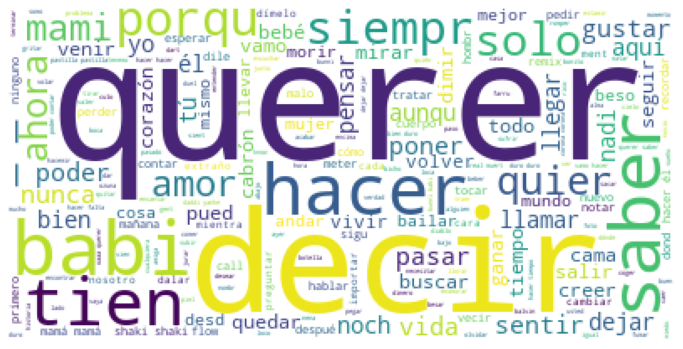

In [47]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(reggaeton_wc)
ax.axis('off')
plt.savefig('WordCloudNLP.png',format ='png',dpi = 100,bbox_inches='tight')
plt.show()
